In [1]:
import camb
from camb import model, initialpower
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import math

In [2]:
cp=camb.read_ini('planck_2018_acc_np_params.ini')   # data

In [3]:
camb.get_results(cp)

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = True
   WantScalars = True
   WantTensors = True
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_both
   Transfer: <TransferParams>
     high_precision = True
     accurate_massive_neutrinos = False
     kmax = 35.335540562730344
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 11000
   max_l_tensor = 2000
   max_eta_k = 500000.0
   max_eta_k_tensor = 3000.0
   ombh2 = 0.0223828
   omch2 = 0.1201075
   omk = 0.0
   omnuh2 = 0.0006451439
   H0 = 67.32117
   TCMB = 2.7255
   YHe = 0.2454006
   num_nu_massless = 2.046
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = True
   nu_mass_degeneracies = [1.0153333333333332]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   InitP

In [4]:
powers=camb.get_results(cp).get_cmb_power_spectra(cp,CMB_unit='muK')  #set unit micro K
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

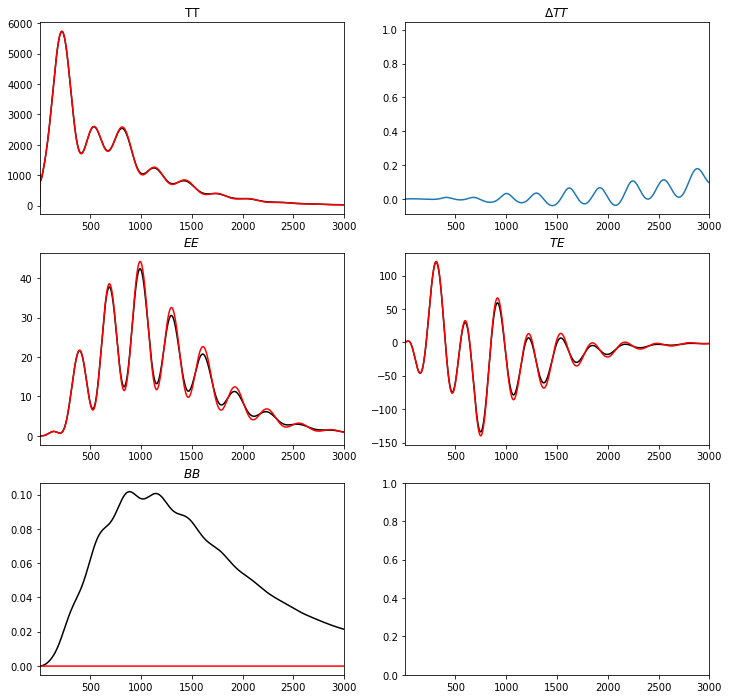

In [5]:
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');

ax[2,0].plot(ls,totCL[:,2], color='k')
ax[2,0].plot(ls,unlensedCL[:,2], color='r')
ax[2,0].set_title(r'$BB$')

for ax in ax.reshape(-1): ax.set_xlim([2,3000]);

<ipython-input-6-aeba42451882>:4: RuntimeWarning: divide by zero encountered in power
  plt.plot(ls,0.015*pow(ls,-0.29))


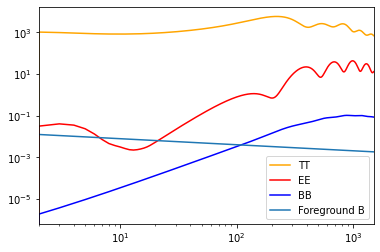

In [6]:
plt.plot(ls,totCL[:,0], color='orange')
plt.plot(ls,totCL[:,1], color='red')
plt.plot(ls,totCL[:,2], color='b')
plt.plot(ls,0.015*pow(ls,-0.29))
plt.xlim([2, 1500])
plt.yscale("log")
plt.xscale("log")
plt.legend(['TT','EE','BB','Foreground B'])
plt.show()


<ipython-input-7-61a9d3ebf509>:4: RuntimeWarning: divide by zero encountered in power
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi))
<ipython-input-7-61a9d3ebf509>:4: RuntimeWarning: invalid value encountered in multiply
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi))


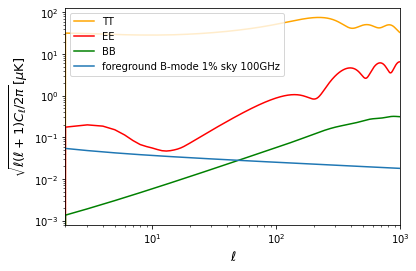

In [7]:

plt.plot(ls,np.sqrt(totCL[:,0]), color='orange')
plt.plot(ls,np.sqrt(totCL[:,1]), color='red')
plt.plot(ls,np.sqrt(totCL[:,2]), color='g')
plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi))

plt.xlim([2, 1000])
plt.yscale("log")
plt.xscale("log")
plt.legend(['TT','EE','BB','foreground B-mode 1% sky 100GHz'])
plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$\sqrt{\ell(\ell+1)C_\ell/2\pi}\,[\mu {\rm K}]$', fontsize=13)
plt.show()


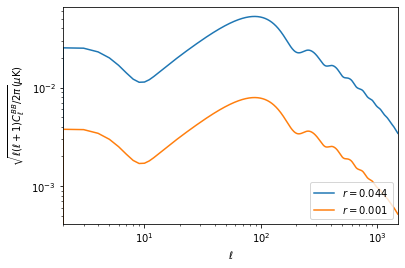

In [8]:
#primordial B mode
inflation_params = initialpower.InitialPowerLaw()
inflation_params.set_params( r=0.044)
results = camb.get_transfer_functions(cp)
results.power_spectra_from_transfer(inflation_params)
cl44 = results.get_unlensed_total_cls(1500, CMB_unit='muK')

inflation_params.set_params( r=0.001)
results = camb.get_transfer_functions(cp)
results.power_spectra_from_transfer(inflation_params)
cl01 = results.get_unlensed_total_cls(1500, CMB_unit='muK')


plt.loglog(np.arange(1501),np.sqrt(cl44[:,2]))
plt.loglog(np.arange(1501),np.sqrt(cl01[:,2]))
plt.xlim([2,1500])
plt.legend(['$r = 0.044$','$r = 0.001$'], loc='lower right');
plt.ylabel(r'$\sqrt{\ell(\ell+1)C_\ell^{BB}/2\pi} ( \mu{\rm K})$')
plt.xlabel(r'$\ell$');

<ipython-input-9-8e2fc9f80ea9>:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')
<ipython-input-9-8e2fc9f80ea9>:6: RuntimeWarning: invalid value encountered in multiply
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')


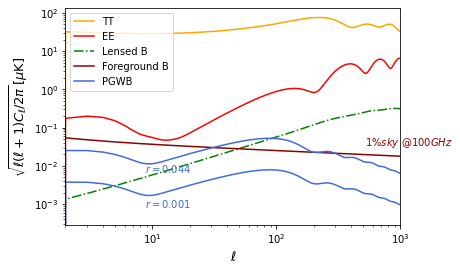

In [9]:
#together

plt.plot(ls,np.sqrt(totCL[:,0]), color='orange')
plt.plot(ls,np.sqrt(totCL[:,1]), color='red')
plt.plot(ls,np.sqrt(totCL[:,2]), 'g-.')
plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')
cl = results.get_unlensed_total_cls(1500, CMB_unit='muK')
plt.plot(np.arange(1501),np.sqrt(cl44[:,2]),'royalblue')
plt.plot(np.arange(1501),np.sqrt(cl01[:,2]),'royalblue')
plt.xlim([2, 1000])
plt.yscale("log")
plt.xscale("log")
plt.legend(['TT','EE','Lensed B','Foreground B','PGWB'])
plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$\sqrt{\ell(\ell+1)C_\ell/2\pi}\,[\mu {\rm K}]$', fontsize=13)
plt.annotate(r'$r=0.044$',xy=(5,0.04),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='royalblue')
plt.annotate(r'$r=0.001$',xy=(5,0.005),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='royalblue')
plt.annotate(r'$1\%sky\ @100GHz$',xy=(300,0.2),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='darkred')
plt.show()


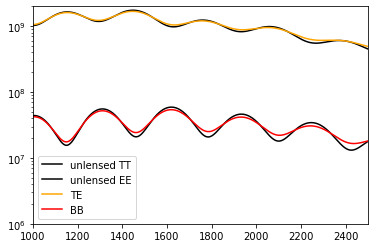

In [10]:
#l=1000-2500

plt.plot(ls,unlensedCL[:,0]/(ls+1)*ls*ls*ls, color='k')
plt.plot(ls,unlensedCL[:,1]/(ls+1)*ls*ls*ls, color='k')
plt.plot(ls,totCL[:,0]/(ls+1)*ls*ls*ls, color='orange')
plt.plot(ls,totCL[:,1]/(ls+1)*ls*ls*ls, color='red')
plt.xlim([1000,2500])
plt.ylim([1000000,2000000000])
plt.yscale("log")
plt.legend(['unlensed TT','unlensed EE','TE','BB'])
plt.show()


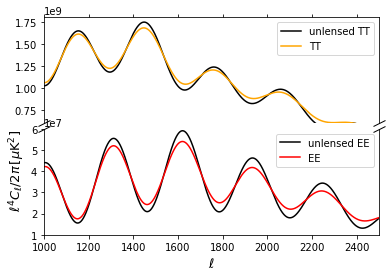

In [11]:
# break y axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(ls,unlensedCL[:,0]/(ls+1)*ls*ls*ls, color='k')

ax2.plot(ls,unlensedCL[:,1]/(ls+1)*ls*ls*ls, color='k')
ax1.plot(ls,totCL[:,0]/(ls+1)*ls*ls*ls, color='orange')
ax2.plot(ls,totCL[:,1]/(ls+1)*ls*ls*ls, color='red')
plt.xlim([1000,2500])
ax1.legend(['unlensed TT','TT'])
ax2.legend(['unlensed EE','EE'])

plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$\ell^4 C_\ell/2\pi\,[\mu {\rm K}^2]$', fontsize=13,loc='top')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(600000000, 1800000000)  # outliers only
ax2.set_ylim(10000000, 60000000)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

<ipython-input-31-49090ea67dd7>:9: RuntimeWarning: divide by zero encountered in power
  foreCL=0.015*pow(ls,-2.29) #FOREGROUND
<ipython-input-31-49090ea67dd7>:18: RuntimeWarning: invalid value encountered in multiply
  plt.plot(ls,np.sqrt(foreCL*ls*(ls+1)/2/np.pi*ant(ls)),'darkred')


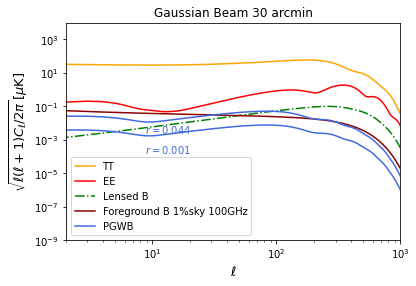

In [31]:
#ideal antenna with FWHM

#together
res=30 #In arcmin, typically for LiteBIRD
FWHM=0.000290888209*res
sigma=FWHM/(2*np.sqrt(2*np.log(2)))


foreCL=0.015*pow(ls,-2.29) #FOREGROUND

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma*sigma)


plt.plot(ls,np.sqrt(totCL[:,0]*ant(ls)), color='orange')
plt.plot(ls,np.sqrt(totCL[:,1]*ant(ls)), color='red')
plt.plot(ls,np.sqrt(totCL[:,2]*ant(ls)), 'g-.')
plt.plot(ls,np.sqrt(foreCL*ls*(ls+1)/2/np.pi*ant(ls)),'darkred')
cl = results.get_unlensed_total_cls(1500, CMB_unit='muK')
plt.plot(np.arange(1501),np.sqrt(cl44[:,2]*ant(np.arange(1501))),'royalblue')
plt.plot(np.arange(1501),np.sqrt(cl01[:,2]*ant(np.arange(1501))),'royalblue')
plt.xlim([2, 1000])
plt.ylim([0.000000001,10000])
plt.yscale("log")
plt.xscale("log")
plt.legend(['TT','EE','Lensed B','Foreground B 1%sky 100GHz','PGWB'])
plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$\sqrt{\ell(\ell+1)C_\ell/2\pi}\,[\mu {\rm K}]$', fontsize=13)
plt.annotate(r'$r=0.044$',xy=(5,0.15),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='royalblue')
plt.annotate(r'$r=0.001$',xy=(5,0.01),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='royalblue')
plt.title('Gaussian Beam 30 arcmin')
plt.show()


<ipython-input-32-fb83deee5da9>:12: RuntimeWarning: divide by zero encountered in power
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')
<ipython-input-32-fb83deee5da9>:12: RuntimeWarning: invalid value encountered in multiply
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')
<ipython-input-32-fb83deee5da9>:21: RuntimeWarning: divide by zero encountered in power
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi*ant(ls)),'darkred',linestyle='dashed',alpha=0.3)
<ipython-input-32-fb83deee5da9>:21: RuntimeWarning: invalid value encountered in multiply
  plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi*ant(ls)),'darkred',linestyle='dashed',alpha=0.3)


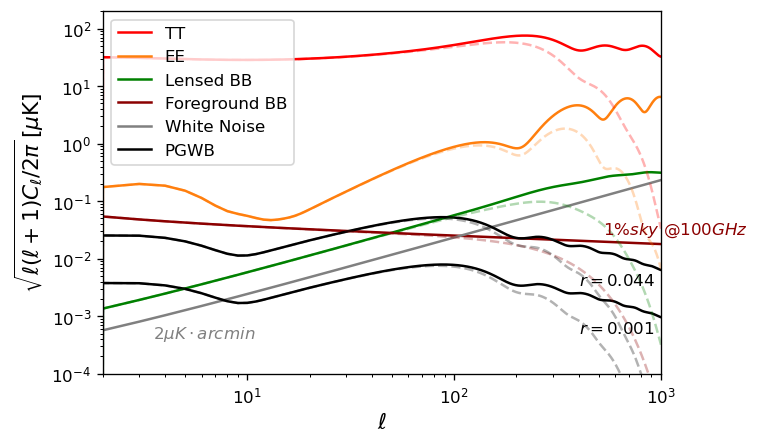

In [32]:
#white noise   2muK*arcmin   
#together
noisesig=2
noisesig_rad=noisesig*np.pi/180/60
noiseCL=noisesig_rad*noisesig_rad


plt.figure(dpi=120)
plt.plot(ls,np.sqrt(totCL[:,0]), color='red')
plt.plot(ls,np.sqrt(totCL[:,1]), color='C1')
plt.plot(ls,np.sqrt(totCL[:,2]), 'g')
plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi),'darkred')
cl = results.get_unlensed_total_cls(1500, CMB_unit='muK')
plt.plot(ls,np.sqrt(noiseCL*ls*(ls+1)/2/np.pi),'grey')
plt.plot(np.arange(1501),np.sqrt(cl44[:,2]),'black')
plt.plot(np.arange(1501),np.sqrt(cl01[:,2]),'black')

plt.plot(ls,np.sqrt(totCL[:,0]*ant(ls)), color='red',linestyle='dashed',alpha=0.3)
plt.plot(ls,np.sqrt(totCL[:,1]*ant(ls)), color='C1',linestyle='dashed',alpha=0.3)
plt.plot(ls,np.sqrt(totCL[:,2]*ant(ls)), 'g',linestyle='dashed',alpha=0.3)
plt.plot(ls,np.sqrt(0.015*pow(ls,-2.29)*ls*(ls+1)/2/np.pi*ant(ls)),'darkred',linestyle='dashed',alpha=0.3)
plt.plot(np.arange(1501),np.sqrt(cl44[:,2]*ant(np.arange(1501))),'black',linestyle='dashed',alpha=0.3)
plt.plot(np.arange(1501),np.sqrt(cl01[:,2]*ant(np.arange(1501))),'black',linestyle='dashed',alpha=0.3)

plt.xlim([2, 1000])
plt.ylim([0.0001,200])
plt.yscale("log")
plt.xscale("log")
plt.legend(['TT','EE','Lensed BB','Foreground BB','White Noise','PGWB'])
plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$\sqrt{\ell(\ell+1)C_\ell/2\pi}\,[\mu {\rm K}]$', fontsize=13)
plt.annotate(r'$r=0.044$',xy=(230,0.025),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
plt.annotate(r'$r=0.001$',xy=(230,0.0037),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
plt.annotate(r'$1\%sky\ @100GHz$',xy=(300,0.2),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='darkred')
plt.annotate(r'$2\mu K\cdot arcmin$',xy=(2,0.003),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='grey')
plt.show()


In [20]:
%store noiseCL
%store foreCL

lenCL=totCL[:,2]
%store lenCL   
#lenCL is with l(l+1)/2pi

Stored 'noiseCL' (float)
Stored 'foreCL' (ndarray)
Stored 'lenCL' (ndarray)
